# Wikileaks Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Access the file from this url: https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1

## Read data

### Direct solution

The most direct approach is to read the `csv` skipping the top and bottom rows, which are not part of the table of data:

In [2]:
wiki = pd.read_csv('Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv',
                   skiprows=1, skipfooter=1)

/Users/dani/anaconda/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


### More general solution

The second option does not remove the final row directly but instead shows you how to remove elements that prevent Python from reading numbers as integer/floats, such as commas (`,`). 

**IMPORTANT**: Keep in mind for this particular analysis, the previous solution is preferred, but this is included to provide more general insight into "cleaning" data.

In [3]:
# skip first row in file so column names load properly
# wiki = pd.read_csv('wikileads.csv', skipfooter=1, skiprows=1, engine='python')
wiki = pd.read_csv('Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv', 
                   skiprows=1)

Now let's tidy up our columns of interest. By default, these columns are loaded as characters (or strings), so in the following cells we convert the character representation of the war logs to numeric so we can perform analysis on them.

In [4]:
select_cols = list(wiki.columns[2:]) # select numeric columns to clean

print(select_cols)

['Taliban', 'Civilians', 'Afghan forces', 'Nato (detailed in spreadsheet)', 'Nato - official figures']


In this function, that we apply to every cell of the dataframe using the applymap function, we firstly convert every cell to a string, remove every comma, then finally convert each cell to a numeric datatype.

In [5]:
# define custom function to remove commas from rows
# so we can convert to a numeric data type
def convert_to_float(x):
    
    # convert every cell to string
    x = str(x)
    
    # remove every comma
    x = x.replace(',', '')
    
    # convert every cell to numeric
    x = float(x)
    
    return x

Now we apply our custom function to the selected columns.

In [6]:
# apply custom function across numeric columns in `select rows` object
wiki.loc[:, select_cols] = wiki.loc[:, select_cols].applymap(convert_to_float)

Next we eyeball a few rows of the dataframe and check datatypes to ensure our function has worked.

In [7]:
wiki.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15.0,51.0,23.0,NaN,11.0
1,2004.0,February,NaN,7.0,4.0,5.0,2.0
2,2004.0,March,19.0,2.0,NaN,2.0,3.0
3,2004.0,April,5.0,3.0,19.0,NaN,3.0
4,2004.0,May,18.0,29.0,56.0,6.0,9.0


In [8]:
# now we have numeric (float64) datatypes to do some analysis on
wiki.dtypes 

Year                              float64
Month                              object
Taliban                           float64
Civilians                         float64
Afghan forces                     float64
Nato (detailed in spreadsheet)    float64
Nato - official figures           float64
dtype: object

### Additional cleaning

Taking a closer look at the months column, there appears to be an erroneous row value in the loaded data, 24498. Let's remove that using pandas subsetting functionality to tidy up the dataset.

In [9]:
# remove erreoneous month (24498)
print(wiki.Month.unique())

wiki = wiki[wiki['Month'] != '24498']

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December' '24498']


## Analysis

With cleaned data, we can now obtain a monthly total count of casualties and create a bar plot from this. We start by grouping rows in the dataframe by month, and then taking the mean value by month.

In [10]:
# do a groupby month taking the mean and subset by Nato figures
nato_figs = wiki.groupby('Month').mean()['Nato - official figures'] 

In [11]:
nato_figs = nato_figs.to_frame().reset_index()

/Users/dani/anaconda/envs/gds/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


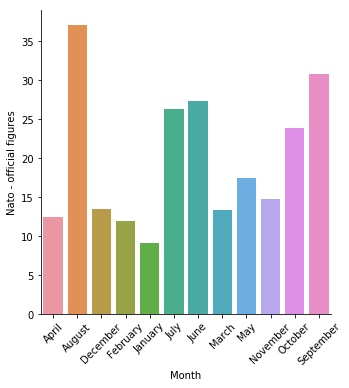

In [12]:
g = sns.factorplot('Month', 'Nato - official figures', data=nato_figs, \
              kind='bar')

g.set_xticklabels(rotation=45);

---

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'18</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.